### Math 395 Learning from Large Data Sets, Hope College, Fall 2024

# Assignment 3 - Linear regression on the wine quality data

First download the data set from the following url:

https://archive.ics.uci.edu/dataset/186/wine+quality

and then unzip it to make a subfolder, called winequality, under your Python working directory (where you have been storing the python scripts from this course).

In this assignment, you are asked to fit a variety of regression models on the wine quality data set, with quality (continuous variable) to be the target variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import seaborn as sns
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression

## First, let us load the two types of wine (red and white) into Python separately. 

We will combine them together later to produce a single data set (with wine type as a categorical variable).

In [2]:
redwine = pd.read_table("winequality/winequality-red.csv", sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
whitewine = pd.read_table("winequality/winequality-white.csv", sep=';')
whitewine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Merge the two types of wine to create an expanded data set

In [6]:
allwine = pd.concat([redwine, whitewine], ignore_index=True)
allwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Define a new variable to record the wine type (1 : red, 0 : white)

In [7]:
winetype = np.concatenate((np.ones(redwine.shape[0]), np.zeros(whitewine.shape[0])))
allwine["winetype"] = winetype
allwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0.0


## Do all of the following now.

### (a) Visualize the target variable (quality) and a few (at least 2) other variables of your choice individually

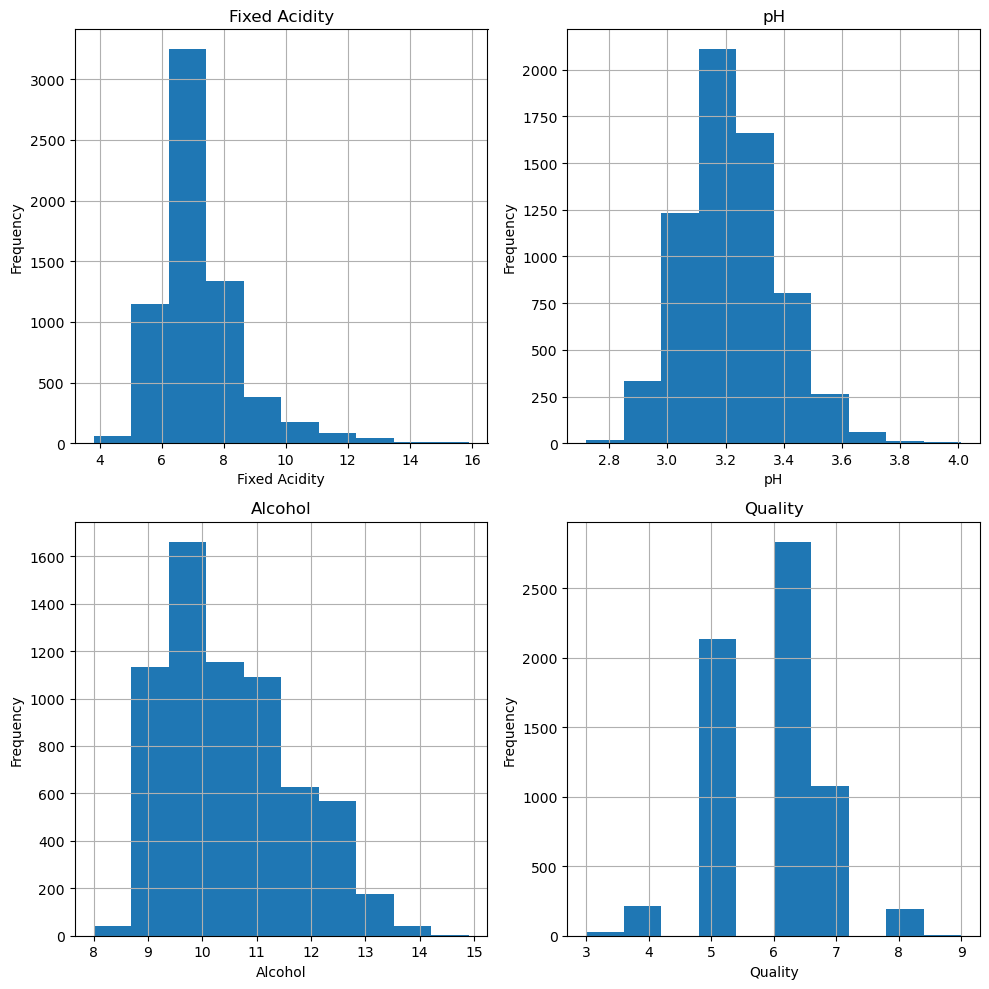

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

allwine["fixed acidity"].hist(ax=ax[0, 0])
ax[0, 0].set_title("Fixed Acidity")
ax[0, 0].set_xlabel("Fixed Acidity")
ax[0, 0].set_ylabel("Frequency")
allwine["pH"].hist(ax=ax[0, 1])
ax[0, 1].set_title("pH")
ax[0, 1].set_xlabel("pH")
ax[0, 1].set_ylabel("Frequency")
allwine["alcohol"].hist(ax=ax[1, 0])
ax[1, 0].set_title("Alcohol")
ax[1, 0].set_xlabel("Alcohol")
ax[1, 0].set_ylabel("Frequency")
allwine["quality"].hist(ax=ax[1, 1])
ax[1, 1].set_title("Quality")
ax[1, 1].set_xlabel("Quality")
ax[1, 1].set_ylabel("Frequency")

# make there be more room between the subplots
plt.tight_layout()
plt.show()

### (b) Make a few scatterplots between quality and each of several (at least 2) features you think would be best predictors

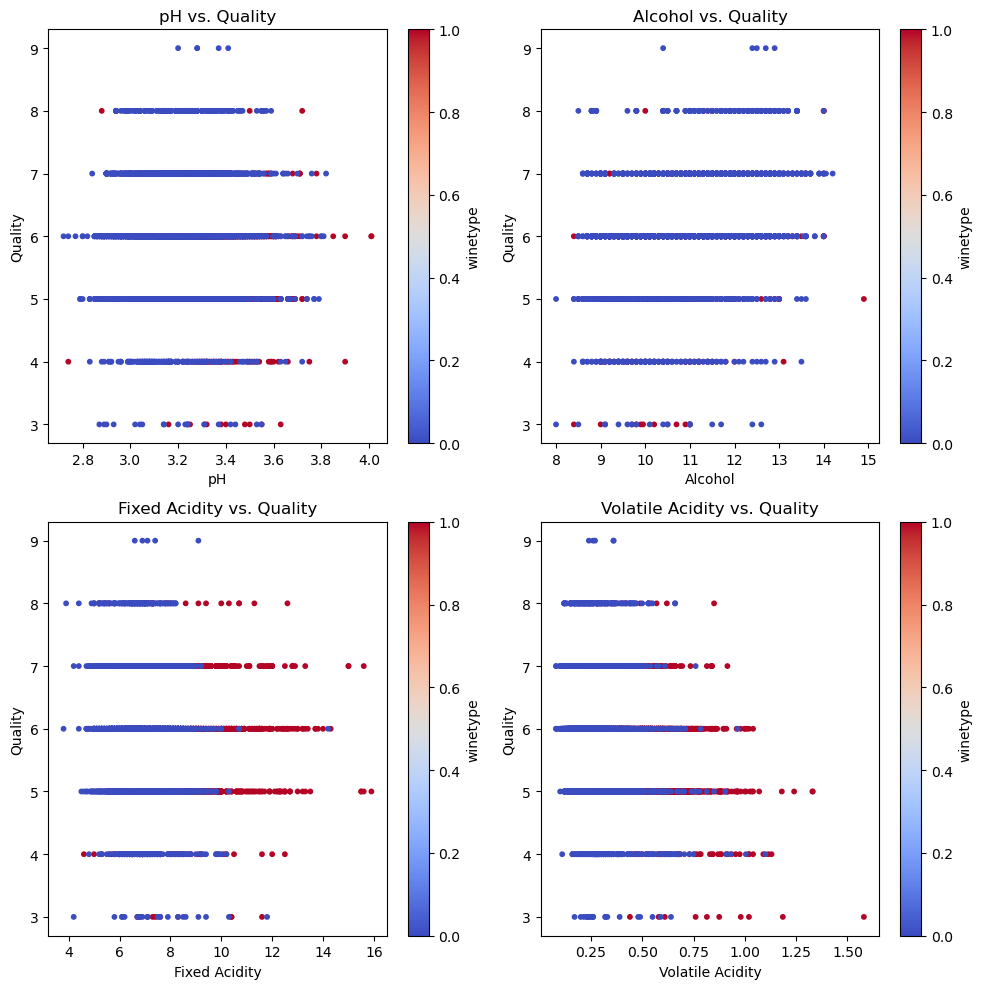

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# scatter plot of pH vs. quality
allwine.plot.scatter("pH", "quality", c="winetype", cmap="coolwarm", s=10, ax=ax[0, 0])
ax[0, 0].set_title("pH vs. Quality")
ax[0, 0].set_xlabel("pH")
ax[0, 0].set_ylabel("Quality")

# scatter plot of alcohol vs. quality
allwine.plot.scatter("alcohol", "quality", c="winetype", cmap="coolwarm", s=10, ax=ax[0, 1])
ax[0, 1].set_title("Alcohol vs. Quality")
ax[0, 1].set_xlabel("Alcohol")
ax[0, 1].set_ylabel("Quality")

# scatter plot of fixed acidity vs. quality
allwine.plot.scatter("fixed acidity", "quality", c="winetype", cmap="coolwarm", s=10, ax=ax[1, 0])
ax[1, 0].set_title("Fixed Acidity vs. Quality")
ax[1, 0].set_xlabel("Fixed Acidity")
ax[1, 0].set_ylabel("Quality")

# scatter plot of volatile acidity vs. quality
allwine.plot.scatter("volatile acidity", "quality", c="winetype", cmap="coolwarm", s=10, ax=ax[1, 1])
ax[1, 1].set_title("Volatile Acidity vs. Quality")
ax[1, 1].set_xlabel("Volatile Acidity")
ax[1, 1].set_ylabel("Quality")

plt.tight_layout()
plt.show()

### (c) Check multicollinearity among all the features, through correlation matrix (which reveals pairwise correlations) and the condition number (overall correlation among all features). 

Comment on your findings. 

In [10]:
matrix = allwine.corr()
matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


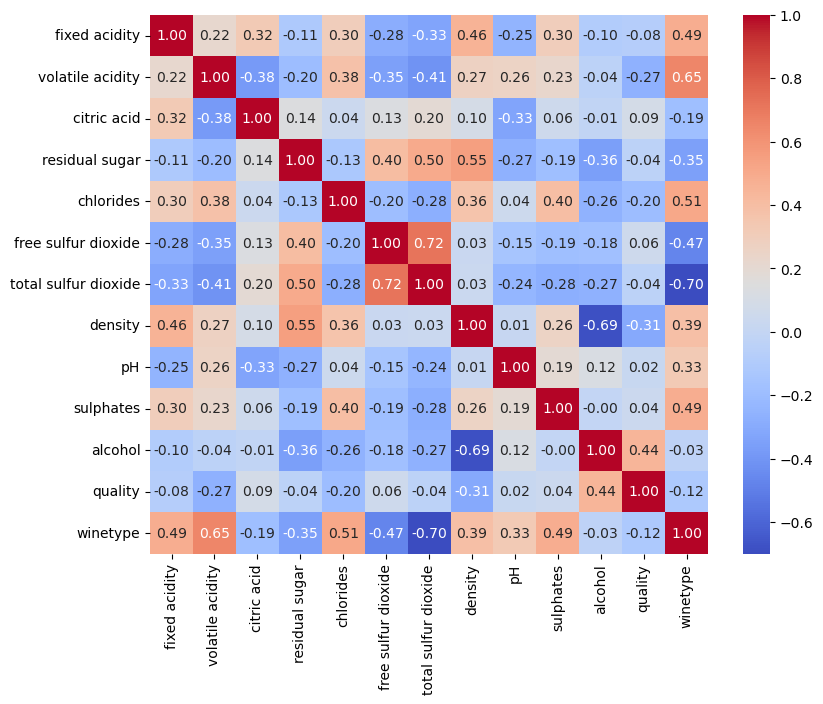

In [11]:
plt.figure(figsize=(9, 7))
heatmap(matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

In [12]:
scaler = StandardScaler()
allwine_scaled = scaler.fit_transform(allwine)
condition_number = np.linalg.cond(allwine_scaled)
condition_number

12.637059742011669

In [13]:
eigenvalues = np.linalg.eigvals(matrix)
condition_number = np.sqrt(eigenvalues.max() / eigenvalues.min())
condition_number

12.637059742014227

Standardize all the features (call the resulting matrix X_norm).

In [14]:
X = allwine.drop(["quality"], axis=1)
y = allwine["quality"]

X_norm = StandardScaler().fit_transform(X)

### Execute the following code to partition the data set into two parts - training (80%) and testing (20%). 

In [15]:
from sklearn.model_selection import train_test_split

# Below X_norm is the matrix of standardized features, y is the target variable (quality)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42) 

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 12), (5197,), (1300, 12), (1300,))

### (d) Perform multiple linear regression on the training data with all features included (we call this the full linear model). 

Compute $R^2$ and RMSE for the training data (use variables with meaningful names like R2_train_full and rmse_train_full to store their values) 

In [16]:
LRmodel = LinearRegression().fit(X_train, y_train)  # fit a linear reg model with intercept

n = y_train.shape[0]
SST = np.sum((y_train-np.sum(y_train)/n)**2)

yhat = LRmodel.predict(X_train)     # fitted values
residuals = y_train - yhat

SSres = np.sum(residuals**2)
mse_train_full = SSres / n
rmse_train_full = np.sqrt(mse_train_full)
R2_train_full = 1 - SSres / SST
R2_train_full, rmse_train_full

(0.30294471018671976, 0.7318414929843036)

Plot the regression coefficients and label those largest (in magnitude) with the feature names. Which features seem to be the most useful predictors?

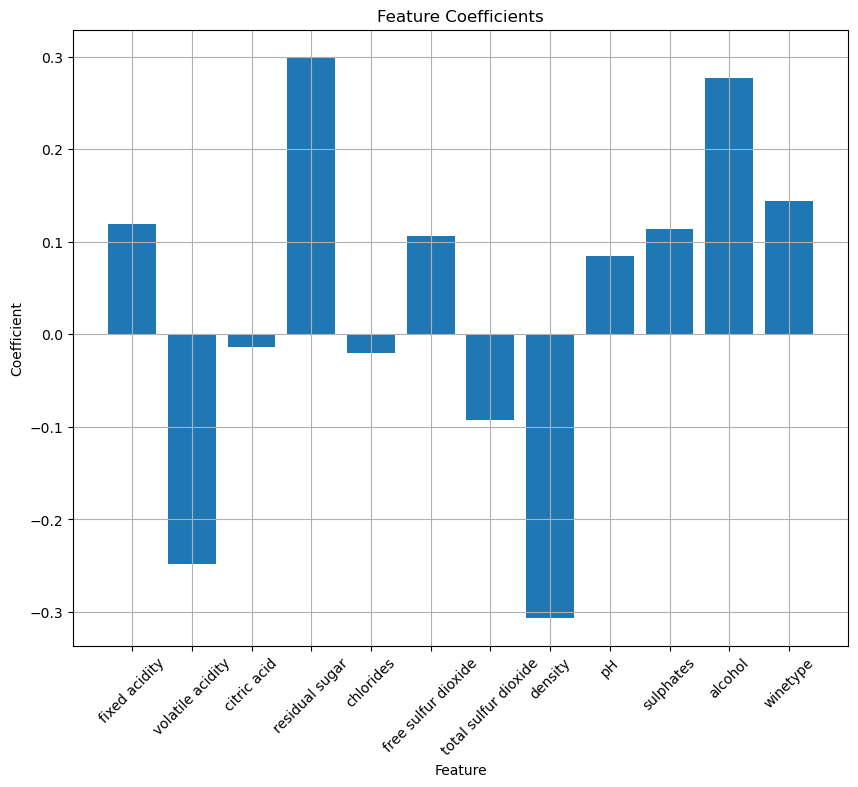

In [28]:
plt.figure(figsize=(10,8))
plt.bar(X.columns, LRmodel.coef_)
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Feature Coefficients")
plt.grid(True)
plt.show()

Plot also the residuals against the fitted values. Is there any nonlinear pattern to be further accounted for?

Apply the model fitted on training data to make predictions on the test data. Compute the RMSE of the test data (call it rmse_test_full). Is it smaller or bigger than rmse_train_full?

## (e) Fit a smaller model on the training data using the best predictors you idenitified in part (d); call it the reduced model. 

How does it compare with the full model in terms of training $R^2$ and RMSE?

Apply the reduced model to the test data and compute the test RMSE (call it rmse_test_reduced). How does it compare with rmse_test_full?

## (f) Fit a second-degree polynomial model on the training data and compare it against the full linear model in terms of training $R^2$ and RMSE. 

Denote the two summaries for the polynomial model by R2_train_poly2 and rmse_train_poly2.

Plot the residuals against the fitted values and comment on it.

Apply the polynomial model fitted on training data to make predictions on the test data. Compute the RMSE of the test data (call it rmse_test_poly2). How does it compare with rmse_test_full?

## (g) Fit a ridge regression model on training data with the optimal alpha parameter (which can be found by using cross validation). 

What are the training $R^2$ and RMSE (denote them by R2_train_ridge and rmse_train_ridge)?

How do the coefficients compare those of the full linear model (no regularization)?

Apply the optimal ridge regression model to the test data and compute the test RMSE (call it rmse_test_ridge). How does it compare with rmse_test_full?

## (h) Fit a lasso regression model with the optimal alpha parameter (which can be found by using cross validation). 

What is the training $R^2$ and RMSE (denote them by R2_train_lasso and rmse_train_lasso)?

Which predictors are kept by Lasso and which ones are excluded from the linear model? Which features are the most important?

Apply the optimal Lasso regression model to the test data and compute the test RMSE (call it rmse_test_lasso). How does it compare with rmse_test_full and rmse_test_ridge?

## (i) Summarize your findings. Which model would you recommend in the end? 